# Chapter 2: derivatives

In [1]:
from IPython.core.display import display
import sympy as smp
from sympy import sin, cos, tan, atan, ln, root, E, Rational

## Exercise 2.1: difference quotient

In [2]:
def falling_velocity(t_start: float, t_stop: float) -> float:
    """Rough estimation of mean falling velocity between two time points"""
    height = lambda at: 10 - 5 * at**2
    delta_t = t_stop - t_start
    numerator = height(t_start + delta_t) - height(t_start)
    return numerator / delta_t

In [3]:
round(falling_velocity(0.0, 0.2), 3)

-1.0

In [4]:
round(falling_velocity(0.0, 0.4), 3)

-2.0

In [5]:
round(falling_velocity(0.8, 1.0), 3)

-9.0

In [6]:
round(falling_velocity(0.0, 1.0), 3)

-5.0

Although it's different from how the exercise was specified, another way to solve this using sympy would be like this for the first example:

In [7]:
t = smp.symbols("t")

formula = 10 - 5 * t**2
display(formula)

derivative = smp.diff(formula)
display(derivative)

(derivative.subs(t, 0.0) + derivative.subs(t, 0.2)) / 2

10 - 5*t**2

-10*t

-1.00000000000000

## Exercise 2.3: analytical differentiation

### Exercise 2.3.1 - determine the derivative

In [8]:
def display_and_diff(func, *, symbols=None, n: int = 1, simplify: bool = False):
    """Convenience function that takes an equation and displays the equation and it's derivative"""
    print("The following equation is given:")
    display(func)
    
    derivatives = []
    for _ in range(n):
        func = smp.diff(func, symbols) if symbols is not None else smp.diff(func)
        print("The derivative of this equation is equal to:")
        display(func)

        if simplify:
            func = func.simplify()
            print("Simplified, this is equal to:")
            display(func)
        derivatives.append(func)
    return func if n == 1 else derivatives

In [9]:
x, ϕ = smp.symbols("x ϕ")

display_and_diff(2 * x);

The following equation is given:


2*x

The derivative of this equation is equal to:


2

In [10]:
display_and_diff(3 * x**2 + x);

The following equation is given:


3*x**2 + x

The derivative of this equation is equal to:


6*x + 1

### Exercise 2.3.2 - determine the derivative

In [11]:
display_and_diff(-5 * x**3 + 5);

The following equation is given:


5 - 5*x**3

The derivative of this equation is equal to:


-15*x**2

In [12]:
display_and_diff((3 * x + 2) * (x**2 - 1), simplify=True);

The following equation is given:


(3*x + 2)*(x**2 - 1)

The derivative of this equation is equal to:


3*x**2 + 2*x*(3*x + 2) - 3

Simplified, this is equal to:


9*x**2 + 4*x - 3

In [13]:
display_and_diff(2 * ϕ * cos(ϕ));

The following equation is given:


2*ϕ*cos(ϕ)

The derivative of this equation is equal to:


-2*ϕ*sin(ϕ) + 2*cos(ϕ)

### Exercise 2.3.3 - velocity on t=1 and t=2

In [14]:
velocity = display_and_diff(t**Rational(1, 3))
velocity.subs(t, 1), velocity.subs(t, 2)

The following equation is given:


t**(1/3)

The derivative of this equation is equal to:


1/(3*t**(2/3))

(1/3, 2**(1/3)/6)

Alternatively, we can do something like this:

In [15]:
velocity = display_and_diff(root(t, 3))
velocity.subs(t, 1), velocity.subs(t, 2)

The following equation is given:


t**(1/3)

The derivative of this equation is equal to:


1/(3*t**(2/3))

(1/3, 2**(1/3)/6)

In [16]:
velocity = display_and_diff(2 * ln(x))
velocity.subs(x, 1), velocity.subs(x, 2)

The following equation is given:


2*log(x)

The derivative of this equation is equal to:


2/x

(2, 1)

In [17]:
velocity = display_and_diff((2 * x - 3) / (x**3 + 7))
velocity.subs(x, 1), velocity.subs(x, 2)

The following equation is given:


(2*x - 3)/(x**3 + 7)

The derivative of this equation is equal to:


-3*x**2*(2*x - 3)/(x**3 + 7)**2 + 2/(x**3 + 7)

(19/64, 2/25)

### Exercise 2.3.4 - determine the derivative:

In [18]:
display_and_diff(root(x**2 + x + 2, 2));

The following equation is given:


sqrt(x**2 + x + 2)

The derivative of this equation is equal to:


(x + 1/2)/sqrt(x**2 + x + 2)

In [19]:
display_and_diff(ln(x**2 + 1));

The following equation is given:


log(x**2 + 1)

The derivative of this equation is equal to:


2*x/(x**2 + 1)

In [20]:
display_and_diff(E**t * ln(t));

The following equation is given:


exp(t)*log(t)

The derivative of this equation is equal to:


exp(t)*log(t) + exp(t)/t

In [21]:
display_and_diff(E**(ln(t**2)));

The following equation is given:


t**2

The derivative of this equation is equal to:


2*t

In [22]:
display_and_diff(tan(2*ϕ), simplify=True);

The following equation is given:


tan(2*ϕ)

The derivative of this equation is equal to:


2*tan(2*ϕ)**2 + 2

Simplified, this is equal to:


2/cos(2*ϕ)**2

In [23]:
display_and_diff(root(t**2 - 1, 3));

The following equation is given:


(t**2 - 1)**(1/3)

The derivative of this equation is equal to:


2*t/(3*(t**2 - 1)**(2/3))

In [24]:
display_and_diff(2 * x * sin(2 * x));

The following equation is given:


2*x*sin(2*x)

The derivative of this equation is equal to:


4*x*cos(2*x) + 2*sin(2*x)

In [25]:
display_and_diff((2 * t - 3) / (t + 7)**3, simplify=True);

The following equation is given:


(2*t - 3)/(t + 7)**3

The derivative of this equation is equal to:


2/(t + 7)**3 - 3*(2*t - 3)/(t + 7)**4

Simplified, this is equal to:


(23 - 4*t)/(t + 7)**4

### Exercise 2.3.5 - velocity at t=1

In [26]:
formula = t*E**(3*t**2)
formula.diff().subs(t, 1).evalf(5)

140.60

I reckon this is a nice excuse to use method chaining as it reads nicely from left-right. I wanted sympy to give a float so I had to add evalf().

In [27]:
formula = atan(root(2 * t - 1, 2))
formula.diff().subs(t, 1)

1/2

## Exercise 2.4: numerical differentiation

### Exercise 2.4.1.a - numerical diff and gradient

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(["default", "science", "notebook"])  # style from SciencePlots library
%config InlineBackend.figure_formats = ['svg']

In [29]:
time = np.linspace(0, 0.8, 9)
location = np.array([0.3, 0.35, 0.45, 0.60, 0.80, 1.0, 1.1, 1.15, 1.15])

In [30]:
np.diff(location) / np.diff(time)

array([0.5, 1. , 1.5, 2. , 2. , 1. , 0.5, 0. ])

In [31]:
np.gradient(location, time)

array([0.5 , 0.75, 1.25, 1.75, 2.  , 1.5 , 0.75, 0.25, 0.  ])

### Exercise 2.4.1.b - draw a smooth line

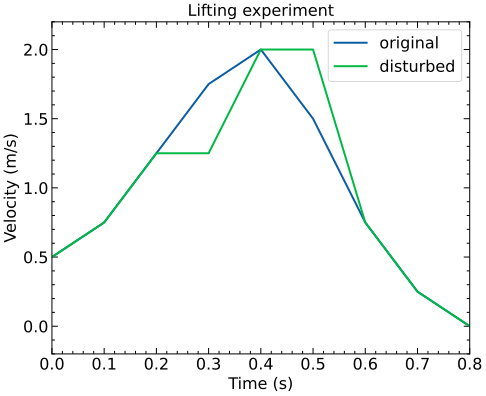

In [32]:
velocity_original = np.gradient(location, time)

location[4] = 0.7
velocity_new = np.gradient(location, time)

plt.figure(figsize=(7.5, 6))
plt.plot(time, velocity_original, label="original")
plt.plot(time, velocity_new, label="disturbed")

plt.margins(0, 0.1)
plt.legend(frameon=True, loc="upper right")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Lifting experiment")
plt.show();

I guess the exercise ordered smooth lines though, which is easy by hand, but takes a little more effort to do with code. By using a cubic spline we should be rewarded with a nice smooth line though:

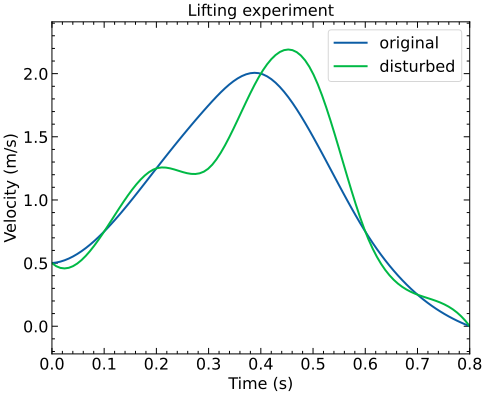

In [33]:
from scipy.interpolate import interp1d

f = interp1d(time, velocity_original, kind="cubic")  # this is a function based on given data points
f2 = interp1d(time, velocity_new, kind="cubic")

tnew = np.linspace(0, 0.8, 100)  # new high-def values for time

plt.figure(figsize=(7.5, 6))
plt.plot(tnew, f(tnew), label="original")
plt.plot(tnew, f2(tnew), label="disturbed")

plt.margins(0, 0.1)
plt.legend(frameon=True, loc="upper right")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Lifting experiment")
plt.show();

A small disruption does indeed cause a big effect on the derivative of the data.

## Exercise 2.5: extrema

Here we need to find the extrema of a figure with a given equation by drawing it's derivative. That would be annoying to do with a computer, but we can get the stationary points with sympy too!

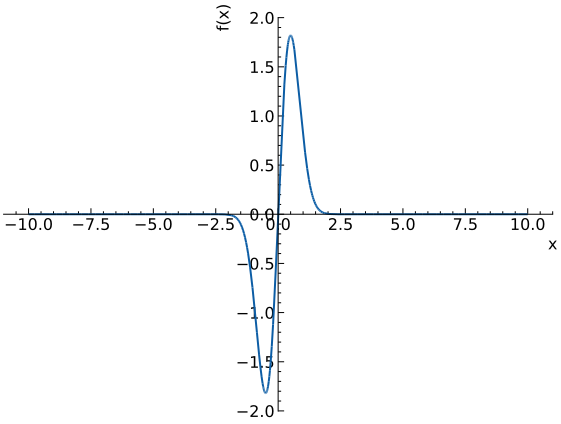

Extrema are located at:


FiniteSet(-1/2, 1/2)

In [34]:
from sympy import stationary_points, plot

equation = 6 * x * E**(-2 * x**2)
plot(equation)

print("Extrema are located at:")
display(stationary_points(equation, x))

## Exercise 2.6: second derivative

### Exercise 2.6.1 - first and second derivative

In [35]:
display_and_diff(ln(2*x), n=2);

The following equation is given:


log(2*x)

The derivative of this equation is equal to:


1/x

The derivative of this equation is equal to:


-1/x**2

In [36]:
display_and_diff(3*x * sin(2*x), n=2);

The following equation is given:


3*x*sin(2*x)

The derivative of this equation is equal to:


6*x*cos(2*x) + 3*sin(2*x)

The derivative of this equation is equal to:


-12*x*sin(2*x) + 12*cos(2*x)

In [37]:
display_and_diff(5*x -1, n=2);

The following equation is given:


5*x - 1

The derivative of this equation is equal to:


5

The derivative of this equation is equal to:


0

In [38]:
display_and_diff(4, n=2);

The following equation is given:


4

The derivative of this equation is equal to:


0

The derivative of this equation is equal to:


0

### Exercise 2.6.2 - velocity and acceleration

In [39]:
A, ω = smp.symbols("A ω")

vel, acc = display_and_diff(A * cos(ω * t), symbols=t, n=2)
display(vel.subs(t, 1), acc.subs(t, 1))

The following equation is given:


A*cos(t*ω)

The derivative of this equation is equal to:


-A*ω*sin(t*ω)

The derivative of this equation is equal to:


-A*ω**2*cos(t*ω)

-A*ω*sin(ω)

-A*ω**2*cos(ω)

In [40]:
vel, acc = display_and_diff(3*t**2 + 2*t - 1, symbols=t, n=2)
display(vel.subs(t, 1), acc.subs(t, 1))

The following equation is given:


3*t**2 + 2*t - 1

The derivative of this equation is equal to:


6*t + 2

The derivative of this equation is equal to:


6

8

6

In [41]:
vel, acc = display_and_diff(ln(0.5*t**3), symbols=t, n=2)
display(vel.subs(t, 1), acc.subs(t, 1))

The following equation is given:


log(0.5*t**3)

The derivative of this equation is equal to:


3.0/t

The derivative of this equation is equal to:


-3.0/t**2

3.00000000000000

-3.00000000000000

### Exercise 2.6.3 - fourth derivative

This one is probably just here to torture students. Luckily it doesn't take long in Python:

In [42]:
display_and_diff(-7*x**5 + 4*x**2 - 23, n=4);

The following equation is given:


-7*x**5 + 4*x**2 - 23

The derivative of this equation is equal to:


-35*x**4 + 8*x

The derivative of this equation is equal to:


8 - 140*x**3

The derivative of this equation is equal to:


-420*x**2

The derivative of this equation is equal to:


-840*x

In [43]:
display_and_diff(15*t**3 + 2*t, n=4);

The following equation is given:


15*t**3 + 2*t

The derivative of this equation is equal to:


45*t**2 + 2

The derivative of this equation is equal to:


90*t

The derivative of this equation is equal to:


90

The derivative of this equation is equal to:


0

In [44]:
display_and_diff(t*E**t, n=4);

The following equation is given:


t*exp(t)

The derivative of this equation is equal to:


t*exp(t) + exp(t)

The derivative of this equation is equal to:


t*exp(t) + 2*exp(t)

The derivative of this equation is equal to:


t*exp(t) + 3*exp(t)

The derivative of this equation is equal to:


t*exp(t) + 4*exp(t)

## Exercise 2.7: partial derivatives

### Exercise 2.7.1 - diff for x

In [45]:
y, z = smp.symbols("y z")

display_and_diff(3*x*y, symbols=x);

The following equation is given:


3*x*y

The derivative of this equation is equal to:


3*y

In [46]:
display_and_diff(5 - (y - 3*x)**2, symbols=x);

The following equation is given:


5 - (-3*x + y)**2

The derivative of this equation is equal to:


-18*x + 6*y

In [47]:
display_and_diff(root(x**2 + y**2 + z**2, 2), symbols=x);

The following equation is given:


sqrt(x**2 + y**2 + z**2)

The derivative of this equation is equal to:


x/sqrt(x**2 + y**2 + z**2)

In [48]:
display_and_diff(x**2 * y - y**2 + z**2 * x, symbols=x);

The following equation is given:


x**2*y + x*z**2 - y**2

The derivative of this equation is equal to:


2*x*y + z**2

### Exercise 2.7.2 - diff for z

In [49]:
u, v, w = smp.symbols("u v w")

display_and_diff(u * sin(v), symbols=v);

The following equation is given:


u*sin(v)

The derivative of this equation is equal to:


u*cos(v)

In [50]:
display_and_diff((u**2 + v**2) / 2*v, symbols=v, simplify=True);

The following equation is given:


v*(u**2/2 + v**2/2)

The derivative of this equation is equal to:


u**2/2 + 3*v**2/2

Simplified, this is equal to:


u**2/2 + 3*v**2/2

In [51]:
display_and_diff(w * E**((u+v)**2), symbols=v, simplify=True);

The following equation is given:


w*exp((u + v)**2)

The derivative of this equation is equal to:


w*(2*u + 2*v)*exp((u + v)**2)

Simplified, this is equal to:


2*w*(u + v)*exp((u + v)**2)

### Exercise 2.7.3 - f(x,y)

In [52]:
equation = E**(-3*x) * cos(2*y)

derivative_x = display_and_diff(equation, symbols=x);

The following equation is given:


exp(-3*x)*cos(2*y)

The derivative of this equation is equal to:


-3*exp(-3*x)*cos(2*y)

In [53]:
derivative_y = display_and_diff(equation, symbols=y);

The following equation is given:


exp(-3*x)*cos(2*y)

The derivative of this equation is equal to:


-2*exp(-3*x)*sin(2*y)

In [54]:
display_and_diff(derivative_x, symbols=y);

The following equation is given:


-3*exp(-3*x)*cos(2*y)

The derivative of this equation is equal to:


6*exp(-3*x)*sin(2*y)

In [55]:
display_and_diff(derivative_y, symbols=x);

The following equation is given:


-2*exp(-3*x)*sin(2*y)

The derivative of this equation is equal to:


6*exp(-3*x)*sin(2*y)

### Exercise 2.7.4 - f(x,y)

In [56]:
equation = display_and_diff(x*y * ln(x + y)**2, symbols=x)

equation.subs(x, 1).subs(y, 2).evalf(4)

The following equation is given:


x*y*log(x + y)**2

The derivative of this equation is equal to:


2*x*y*log(x + y)/(x + y) + y*log(x + y)**2

3.879

I get a different solution than the book and I honestly don't see why. I cross-validated it with a graphing calculator. I'm gonna go on a limb and say the answers in the book are wrong (it can't possibly be me right?!).

### Exercise 2.7.5 - f(x,y)

In [57]:
equation = display_and_diff(x*y**2 * sin(y*x**0.5), symbols=x)

equation.subs(x, 4).subs(y, 2).evalf(4)

The following equation is given:


x*y**2*sin(x**0.5*y)

The derivative of this equation is equal to:


0.5*x**0.5*y**3*cos(x**0.5*y) + y**2*sin(x**0.5*y)

-8.256

## Exercise 2.8: Least squares

In [58]:
i = smp.symbols("i", integer=True)

summation = smp.Sum(x, (i, 1, 4))
display(summation, summation.doit())

Sum(x, (i, 1, 4))

4*x

In [59]:
equation = smp.Sum(3*x, (i, 1, 4)) - 3*smp.Sum(x, (i, 1, 4))
equation.simplify()

0

The result is 0, hence they are equal.

In [60]:
summation.subs(x, 3).evalf()

12.0000000000000

In [61]:
a, b, c = smp.symbols("a b c")

equation = a + b*t + c*t**2
display(equation, smp.diff(equation, a), smp.diff(equation, b), smp.diff(equation, c))

a + b*t + c*t**2

1

t

t**2

## Exercise 2.9: Taylorstuff

In [62]:
equation = E**x
taylor1 = smp.series(equation, x, 0, 4).removeO()
taylor2 = smp.series(equation, x, 1, 4).removeO()
display(equation, taylor1, taylor2)

exp(x)

x**3/6 + x**2/2 + x + 1

E*(x - 1)**3/6 + E*(x - 1)**2/2 + E*(x - 1) + E

In [63]:
equation = ln(1 + x)
f1 = equation.subs(x, 0.5)
f2 = smp.series(equation, x, 0, 4).removeO().subs(x, 0.5)
abs(f1 - f2).evalf(4)

0.01120

In [64]:
equation = root(x, 2)
f1 = equation.subs(x, 0.5)
f2 = smp.series(equation, x, 1, 3).removeO().subs(x, 0.5)
abs(f1 - f2).evalf(4)

0.01164

In [65]:
equation = 14*t**3 + 8*t**2 + 3
taylor = smp.series(equation, t, 0, 5)
display(equation, taylor)

14*t**3 + 8*t**2 + 3

14*t**3 + 8*t**2 + 3